<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from io import StringIO

csv_data = """
LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,DEFAULT
20000,2,2,1,24,0,2,3913,3102,0,689,1
120000,2,2,2,26,0,0,2682,1725,1000,1000,1
90000,2,2,2,34,0,0,29239,14027,2000,2019,0
50000,2,2,1,37,0,0,46990,48233,1200,1100,0
50000,1,1,2,57,-1,0,8617,5670,1000,1000,0
50000,1,1,1,37,0,0,64400,36856,2000,2000,0
500000,1,1,2,29,0,0,367965,412023,5000,4000,1
30000,1,1,1,23,0,0,11876,380,1000,1000,1
80000,2,2,2,28,0,0,30365,29656,2500,1815,0
120000,2,2,2,32,0,0,405,404,1000,1000,0
"""

df = pd.read_csv(StringIO(csv_data))
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,DEFAULT
0,20000,2,2,1,24,0,2,3913,3102,0,689,1
1,120000,2,2,2,26,0,0,2682,1725,1000,1000,1
2,90000,2,2,2,34,0,0,29239,14027,2000,2019,0
3,50000,2,2,1,37,0,0,46990,48233,1200,1100,0
4,50000,1,1,2,57,-1,0,8617,5670,1000,1000,0


In [3]:
import numpy as np

df_big = pd.concat([df] * 100, ignore_index=True)
df_big = df_big.sample(1000, random_state=42).reset_index(drop=True)

df_big.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,DEFAULT
0,120000,2,2,2,26,0,0,2682,1725,1000,1000,1
1,30000,1,1,1,23,0,0,11876,380,1000,1000,1
2,20000,2,2,1,24,0,2,3913,3102,0,689,1
3,20000,2,2,1,24,0,2,3913,3102,0,689,1
4,120000,2,2,2,26,0,0,2682,1725,1000,1000,1


In [4]:
df_big.shape

(1000, 12)

In [5]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  1000 non-null   int64
 1   SEX        1000 non-null   int64
 2   EDUCATION  1000 non-null   int64
 3   MARRIAGE   1000 non-null   int64
 4   AGE        1000 non-null   int64
 5   PAY_1      1000 non-null   int64
 6   PAY_2      1000 non-null   int64
 7   BILL_AMT1  1000 non-null   int64
 8   BILL_AMT2  1000 non-null   int64
 9   PAY_AMT1   1000 non-null   int64
 10  PAY_AMT2   1000 non-null   int64
 11  DEFAULT    1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [6]:
df_big.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2,DEFAULT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,111000.000000,1.600000,1.600000,1.600000,32.700000,-0.10000,0.2000,56645.200000,55207.600000,1670.000000,1562.300000,0.400000
std,133816.691436,0.490143,0.490143,0.490143,9.386059,0.30015,0.6003,105732.483753,120097.657204,1296.835295,930.384343,0.490143
min,20000.000000,1.000000,1.000000,1.000000,23.000000,-1.00000,0.0000,405.000000,380.000000,0.000000,689.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,26.000000,0.00000,0.0000,3913.000000,1725.000000,1000.000000,1000.000000,0.000000
50%,65000.000000,2.000000,2.000000,2.000000,30.500000,0.00000,0.0000,20557.500000,9848.500000,1100.000000,1050.000000,0.000000
75%,120000.000000,2.000000,2.000000,2.000000,37.000000,0.00000,0.0000,46990.000000,36856.000000,2000.000000,2000.000000,1.000000
max,500000.000000,2.000000,2.000000,2.000000,57.000000,0.00000,2.0000,367965.000000,412023.000000,5000.000000,4000.000000,1.000000


In [7]:
df_big.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
BILL_AMT1,0
BILL_AMT2,0
PAY_AMT1,0


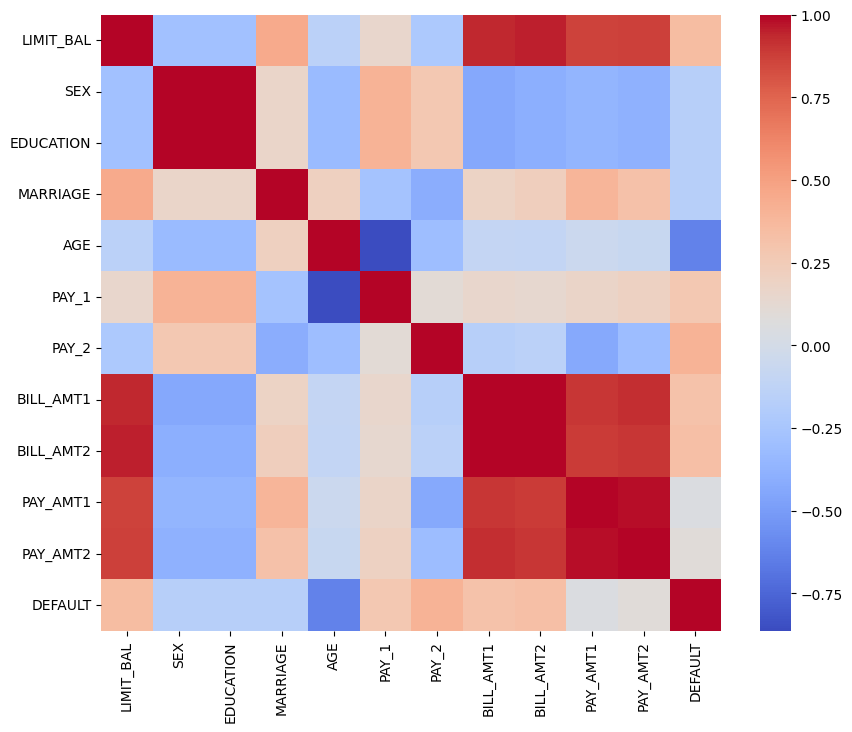

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df_big.corr(), cmap="coolwarm")
plt.show()

In [11]:
X = df_big.drop("DEFAULT", axis=1)
y = df_big["DEFAULT"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC()
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results

{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'SVM (RBF)': 1.0}

In [15]:
best_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[120   0]
 [  0  80]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

